In [1]:
#  Copyright (c) Microsoft Corporation.
#  Licensed under the MIT License.

In [1]:
import sys, site
from pathlib import Path
import stock_price_prediction
import glob
import pandas as pd
import matplotlib.pyplot as plt

scripts_dir = Path.cwd().parent.joinpath("scripts")
if not scripts_dir.joinpath("download_data.py").exists():
    # download get_data.py script
    scripts_dir = Path("~/tmp/qlib_code/scripts").expanduser().resolve()
    scripts_dir.mkdir(parents=True, exist_ok=True)
    import requests
    with requests.get("https://raw.githubusercontent.com/jgehunter/stock_price_prediction/main/scripts/download_data.py") as resp:
        with open(scripts_dir.joinpath("download_data.py"), "wb") as fp:
            fp.write(resp.content)

In [2]:
# Download data
file_name = "AAPL.parquet"
target_dir = "~/OneDrive - Santander Office 365/Projects/stock_price_prediction/Data/"
tickers = "AAPL"
start_date = "2015-01-01"

In [ ]:
from stock_price_prediction.download.ticker_download import GetData
GetData()._download_data(file_name, target_dir, tickers, start=start_date)

In [3]:
# Load data in df
data_path = glob.glob(str(Path(target_dir + "/*_" + file_name).expanduser()))
stock_df = pd.read_parquet(data_path)

<AxesSubplot:xlabel='Date'>

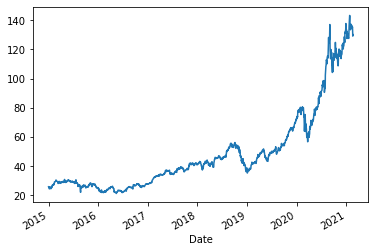

In [4]:
stock_df["Open"].plot()

In [4]:
from stock_price_prediction.models.sfm_model import SFM

In [5]:
sfm_model = SFM(d_feat=1)

2021-02-21 17:17:00.230 | INFO     | stock_price_prediction.models.sfm_model:__init__:204 - SFM pytorch version...
2021-02-21 17:17:00.262 | INFO     | stock_price_prediction.models.sfm_model:__init__:260 - SFM parameters setting:
d_feat : 1
hidden_size : 64
output_size : 1
frequency_dimension : 10
dropout_W: 0.0
dropout_U: 0.0
n_epochs : 200
lr : 0.001
metric : 
batch_size : 2000
early_stop : 20
eval_steps : 5
optimizer : gd
loss_type : mse
visible_GPU : 0
use_GPU : False
seed : None


In [6]:
import random

In [7]:
x_train = []
y_train = []

In [8]:
random_index = random.randint(0,len(stock_df)-1)
x_train_sample = stock_df[:random_index]["Open"]
y_train_sample = stock_df.iloc[random_index+1]["Open"]
x_train.append(x_train_sample)
y_train.append(y_train_sample)

In [9]:
x_val = []
y_val = []

In [10]:
random_index = random.randint(0,len(stock_df)-1)
x_val_sample = stock_df[:random_index]["Open"]
y_val_sample = stock_df.iloc[random_index+1]["Open"]
x_val.append(x_val_sample)
y_val.append(y_val_sample)

In [11]:
y_train_sample

45.392179283109975

In [12]:
sfm_model.fit(x_train_sample, x_train_sample.shift(), x_val_sample, x_val_sample.shift())

2021-02-21 17:17:09.351 | INFO     | stock_price_prediction.models.sfm_model:fit:363 - training...
2021-02-21 17:17:09.352 | INFO     | stock_price_prediction.models.sfm_model:fit:367 - Epoch%d:
2021-02-21 17:17:09.355 | INFO     | stock_price_prediction.models.sfm_model:fit:368 - training...
2021-02-21 17:17:09.356 | INFO     | stock_price_prediction.models.sfm_model:fit:370 - evaluating...


UnboundLocalError: local variable 'init_freq' referenced before assignment